# CSCE 470 :: Information Storage and Retrieval :: Texas A&M University :: Fall 2018


# Homework 1: Searching Amazon Reviews

### 100 points [5% of your final grade]

*Goals of this homework:* The objective of this homework is to understand the importance of tokenization for IR and learn how to implement a basic vector space model for document ranking.

*Submission Instructions (Google Classroom):* To submit your homework, rename this notebook as  `lastname_firstinitial_hw#.ipynb`. For example, my homework submission would be: `caverlee_j_hw1.ipynb`. Submit this notebook via Google Classroom. Your IPython notebook should be completely self-contained, with the results visible in the notebook. We should not have to run any code from the command line, nor should we have to run your code within the notebook (though we reserve the right to do so).

*Due:* September 16, 2018 by 11:59pm. For this homework, you may use up to three of your late days, meaning that no submissions will be accepted after September 19 at 11:59pm.

## Dataset: Amazon Review Data

We're providing you with a small collection of 200 product (books) reviews collected from Amazon: **review.json**. You should treat each review as a unique document to be indexed by your system. You can download the reviews from Google Classroom to your local filesystem. We're going to use these reviews as the basis of an Amazon Review Search Engine!

## Step 1: Read and Parse the Amazon Data [5pts]

Recall how we handled file input in Homework 0? Well, here, our goal is to read in the Amazon reviews so that we can begin to tokenize them later. For this step, you should read the dataset from your local filesystem and print the reviews. Note that our dataset is in json format. A document looks like:

{'reviewerID': 'ATBGGCX75KLTT',
  'asin': '0028610105',
  'reviewText': 'This is the ideal book for anyone.  It has everything you can think of in it.  I was going to give it to by daughter, but I think I will keep it.  My husband is always asking how to make???  so now he can!'}
  
where:

* **reviewerID** is a reviewer's unique ID
* **asin** is the product's unique Amazon ID
* **reviewText** is the actual text of the review that we care about.

For this homework, you should treat the **reviewText** as a document and the **reviewerID** as the document ID.

Your output should look like this:

DocumentID   Document

ATBGGCX75KLTT This is the ideal book for anyone.  It has everything you can think of in it.  I was going to give it to by daughter, but I think I will keep it.  My husband is always asking how to make???  so now he can!

... ...

In [17]:
# read the data
import json
with open('review.json') as json_file:  
    reviews = json.load(json_file)

In [18]:
# your code here
for review in reviews:
    print(review['reviewerID'] + ' ' + review['reviewText'])

ATBGGCX75KLTT This is the ideal book for anyone.  It has everything you can think of in it.  I was going to give it to by daughter, but I think I will keep it.  My husband is always asking how to make???  so now he can!
A1V0EJ9FTATZSC I agree with the first two reviewers concerning the over abundance of detail.  I found myself constantly referring back to the list of characters and not always finding the object of my search.  A rudimentary map of the English countryside would have been helpful, also.  Just to read that a character is being moved to another castle really doesn't mean very much.  I have read a few books about this period, and I can't say that I learned anything new from this book. I would have liked to learn more about Thomas Cromwell and others in the Tudor court, but I just got lost in all the verbiage.  In fact, I'm quitting at only about two thirds of the way through.  This may be a great book for the serious history student, but not, I think,  for the casual reader.

## Step 2: Basic Tokenization

Now that you can read the documents, let's move on to tokenization. Different tokenization methods can have a big influence on the final results. Here we try three different tokenization methods:

### Strategy 1 [5pts]
The first tokenization strategy is to tokenize each review using **whitespaces and punctuations as delimiters**. You should also lowercase all words. You should write a function to do this tokenization strategy and print the tokens. 

Your output should look like this:

DocumentID   Tokens

ATBGGCX75KLTT this is the ideal book for anyone it has everything you can think of in it ...

In [19]:
# your code here
import re
tokenizedReviews = [
    {'id': review['reviewerID'], 'tokens': re.findall(r"\w+", review['reviewText'].lower())}
    for review in reviews
]
for review in tokenizedReviews:
    print(review['id'] + ' ' + ' '.join(review['tokens']))

ATBGGCX75KLTT this is the ideal book for anyone it has everything you can think of in it i was going to give it to by daughter but i think i will keep it my husband is always asking how to make so now he can
A1V0EJ9FTATZSC i agree with the first two reviewers concerning the over abundance of detail i found myself constantly referring back to the list of characters and not always finding the object of my search a rudimentary map of the english countryside would have been helpful also just to read that a character is being moved to another castle really doesn t mean very much i have read a few books about this period and i can t say that i learned anything new from this book i would have liked to learn more about thomas cromwell and others in the tudor court but i just got lost in all the verbiage in fact i m quitting at only about two thirds of the way through this may be a great book for the serious history student but not i think for the casual reader
A19XXXTLGQE42V thelma madine writ

### Strategy 2 [5pts]
Another strategy is to treat a valid token as a *sequence of 3 or more characters drawn from the alphabet [a-zA-Z]*. Besides that, we also treat all whitespace and non-character data as delimiters. You should also lowercase all words which is the same as in Strategy 1.

Your output should look like this:

DocumentID   Tokens

ATBGGCX75KLTT this the ideal book for anyone has everything you can think...


In [20]:
# your code here
import re
tokenizedReviews = [
    {'id': review['reviewerID'], 'tokens': re.findall(r"[a-zA-Z]{3,}", review['reviewText'].lower())}
    for review in reviews
]
for review in tokenizedReviews:
    print(review['id'] + ' ' + ' '.join(review['tokens']))

ATBGGCX75KLTT this the ideal book for anyone has everything you can think was going give daughter but think will keep husband always asking how make now can
A1V0EJ9FTATZSC agree with the first two reviewers concerning the over abundance detail found myself constantly referring back the list characters and not always finding the object search rudimentary map the english countryside would have been helpful also just read that character being moved another castle really doesn mean very much have read few books about this period and can say that learned anything new from this book would have liked learn more about thomas cromwell and others the tudor court but just got lost all the verbiage fact quitting only about two thirds the way through this may great book for the serious history student but not think for the casual reader
A19XXXTLGQE42V thelma madine writes well keeps the pace and shows her true spirit hadn seen much the gypsy wedding programme enjoyed her story like many she has had

### Strategy 3 [5pts]
Further, we could also choose to apply stemming to the results from the previous strategy. For this strategy, use the Porter Stemmer. If you like, you can use the version installed in NLTK (a helpful natural language toolkit): [https://www.nltk.org/](https://www.nltk.org/)

where you would do something like:

```
from nltk.stem.porter import PorterStemmer
```

Your output should follow the style of the previous two strategies.

In [21]:
# your code here
import re
from nltk.stem import PorterStemmer
stemmer=PorterStemmer()

tokenizedReviews = [
    {'id': review['reviewerID'],
     'tokens': [stemmer.stem(tok) for tok in re.findall(r"\w{3,}", review['reviewText'].lower())]}
    for review in reviews
]
for review in tokenizedReviews:
    print(review['id'] + ' ' + ' '.join(review['tokens']))

ATBGGCX75KLTT thi the ideal book for anyon ha everyth you can think wa go give daughter but think will keep husband alway ask how make now can
A1V0EJ9FTATZSC agre with the first two review concern the over abund detail found myself constantli refer back the list charact and not alway find the object search rudimentari map the english countrysid would have been help also just read that charact be move anoth castl realli doesn mean veri much have read few book about thi period and can say that learn anyth new from thi book would have like learn more about thoma cromwel and other the tudor court but just got lost all the verbiag fact quit onli about two third the way through thi may great book for the seriou histori student but not think for the casual reader
A19XXXTLGQE42V thelma madin write well keep the pace and show her true spirit hadn seen much the gypsi wed programm enjoy her stori like mani she ha had her up and down and come out top show her grit and determin thoroughli enjoy rea

### Observations [5pts]
Based on these three strategies, which one do you prefer? Why? You should make a clear argument with positive points and negative points. Please include examples. 

*Hint: There is no one correct answer here. We're mainly looking at the quality of your argument for whatever strategy you prefer.*

Ultimately, I feel that the third strategy results in the most usable data for quickly determining the content of the document.  However, we are technically throwning away valuable data in each step of the process, since puncuation and word form can have a huge impact on the meaning of a given block of text.  Some documents may in fact be primarily composed of non-verbal material, but are still relevant and useful to the entity querying for them.

Based on this particular assignment, I was dissapointed to see that NLTKs stemmer used in Strategy 3 stripped away characters from the ends of words that were already at their minimum length.  Because of this, and the value of tense in determining document "intent", I feel the second strategy is my personal favorite in this sample data.

Example of PortStemmer error: "everything" -> "everyth"
Example of non-alphabet confusion: "we bought 0 apples" -> "we bought apples"

## Step 3: The Most Popular Words [5pts]

Great, now we can tokenize the documents. Let's take a look at the most popular words in our reviews by using Strategy 2 (same for all of the steps below). For this step, you should maintain a count of how many times each word occurs. Then you should print out the top-10 words in your reviews.

Your output should look like this:

Rank Token Count

1 awesome 78
2 cool 45
... ...

In [22]:
# your code here
import re

tokenizedReviews = [
    {'id': review['reviewerID'], 'tokens': re.findall(r"[A-Za-z]{3,}", review['reviewText'].lower())}
    for review in reviews
]

wordCount = {}
for review in tokenizedReviews:
    for word in review['tokens']:
        if word in wordCount:
            wordCount[word] += 1
        else:
            wordCount[word] = 1

from collections import Counter
rank = 1
metrics = Counter(wordCount)
for k,v in metrics.most_common(10):
    print(rank, k, v)
    rank += 1

1 the 1396
2 and 728
3 this 350
4 book 302
5 that 276
6 was 219
7 for 201
8 with 179
9 but 156
10 read 148


## Step 4: Zipf's Law [10pts]

Recall in class our discussion of Zipf's law. Let's see if this law applies to our Amazon reviews. You should use matplotlib to plot the log-base10 term counts on the y-axis versus the log-base10 rank on the x-axis. Your aim is to create a figure like the one in Figure 5.2 of the textbook.

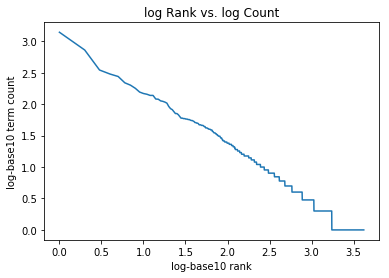

In [23]:
# your code here
import matplotlib.pyplot as plt
import math

termCounts = [wordCount[word] for word in wordCount]
termCounts.sort(reverse=True)

x = [math.log10(i) for i in range(1,len(termCounts)+1)]
y = [math.log10(e) for e in termCounts]
plt.plot(x, y)
plt.xlabel('log-base10 rank')
plt.ylabel('log-base10 term count')
plt.title('log Rank vs. log Count')
plt.show()

### Observations
What do you observe? Is this consistent with Zipf's law?

This is actually fairly consistent with Zipf's Law.  I personally think it's easier to see when you only take the log of the term count (AKA occurance frequency), but that's just me.
To elaborate, the ratio of frequencies of individual words is roughly proportional to ratio of their rank in the frequency distribution.

## Step 5: Vector Space Model [45pts]

Since the dataset is ready, we can implement our basic ranked retrieval engine now. Your goal is to implement the basic Vector Space Model using cosine and the standard TFIDF scores: that is, use log-weighted term frequency: 1+log(tf); and the log-weighted inverse document frequency: log (N/df). For the query vector use simple weights (just raw counts, no logs). Remember, you should apply the same tokenizer to your query that you also apply to your documents.

You should print the top-10 Documents for an arbitrary input query. The output should like like this:

Rank DocumentID  Score

1     R3I9CO6P8ON1ER 0.341

2     R33XAFPLMCBWRV 0.252

... ...

For the first example, show the results for the query: *`amazing book`*

In [1]:
# your code here
# feel free to add as many cells as you need
# you will probably want to create several functions to help you out
import math, sys, json, re
from collections import defaultdict
from functools import reduce

# Input reviews
with open('review.json') as json_file:  
    reviews = json.load(json_file)

# Compute things
N = len(reviews) # number of documents (reviews)
dictionary = set() # number of unique terms in the document
postings = defaultdict(dict) # {term: {review: term_frq_for_this_review}}
docu_freq = defaultdict(int) # {term: num_reviews_containing_term}
length = defaultdict(float) # {reviewID: Euclidean length of review vector}

# Tokenize util (used on documents and query)
def tokenize(document):
    return re.findall(r"[A-Za-z]{3,}", document.lower())

def idf(term):
    if term in dictionary:
        return math.log(N/docu_freq[term], 2)
    else: return 0.0

def imp(term, reviewerID):
    if reviewerID in postings[term]:
        return postings[term][reviewerID]*idf(term)
    else: return 0.0

# Tokenize reviews and update global vars
for review in reviews:
    terms = tokenize(review['reviewText'])
    unique_terms = set(terms)
    dictionary = dictionary.union(unique_terms)
    for term in unique_terms:
        postings[term][review['reviewerID']] = terms.count(term)

for term in dictionary:
    docu_freq[term] = len(postings[term])

for review in reviews:
    l = 0
    for term in dictionary:
        l += imp(term, review['reviewerID'])**2
    length[review['reviewerID']] = math.sqrt(l)

def intersection(sets):
    return reduce(set.intersection, [s for s in sets])
def union(sets):
    return reduce(set.union, [s for s in sets])

def similarity(query, reviewerID):
    similarity = 0.0
    for term in query:
        if term in dictionary:
            similarity += idf(term)*imp(term,reviewerID)
    similarity = similarity / length[reviewerID]
    return similarity

def run_search(query):
    query = tokenize(query)
    #print([set(postings[term].keys()) for term in query])
    results = union([set(postings[term].keys()) for term in query])
    if not results:
        print("No results found!")
    else:
        match_scores = [
            (reviewerID, similarity(query, reviewerID))
            for reviewerID in results
        ]
        match_scores.sort(key=lambda x: x[1], reverse=True)
        print("Results ("+str(len(match_scores))+"):")
        rank = 1
        for (reviewerID, score) in match_scores:
            print(rank, reviewerID, score)
            if rank == 10: break
            rank += 1
    

# run search
run_search("amazing book")

Results (140):
1 AD3D23RISLTLQ 1.3267619537334525
2 A1NQJXDRLMA5WU 1.3054184493679073
3 AEJ9C7IWO3SZ0 0.7705438732869648
4 AY15X4NPV16QP 0.737969328076311
5 A3NTX86CZWCGWU 0.6281820228335163
6 AOVPYW3UODXQ2 0.5887251533266035
7 A2BIJQ26TDCZYQ 0.5397624868885417
8 ANDIM9VNUG0RB 0.4514429289020653
9 AMS383P9S58WB 0.4025988781426085
10 A3CC24EQUYSGGX 0.3746430865185832


Now show the results for the query: *`swedish`*

In [25]:
# your code here
run_search("swedish")

Results (1):
1 A1XRQ6YJ7HXQFQ 0.7893407078015263


Now show the results for the query: *`american`*

In [26]:
# your code here
run_search("american")

Results (10):
1 A35U3PVERCQND7 0.6532148913713645
2 A398WCTKA2RDVC 0.6172735923974176
3 A1U8DHSI18EEJ1 0.508890077484665
4 A115US2YWWZH87 0.40986445387785947
5 A23GFTVIETX7DS 0.34382563379320036
6 A2I54AR29TPRK3 0.32280164787920995
7 A2KIVODZRTGY4U 0.2790435433336571
8 A3CCZBWCMOXMS6 0.2330839201007892
9 AII2CYHIJ0PP6 0.2160028421587169
10 A184K71GMS0COC 0.1711686595194636


Now show the results for the query: *`I read it`*

In [27]:
# your code here
run_search("I read it")

Results (102):
1 A3VPCMAW4WY51J 0.10192829170882435
2 A1Q0C3R3DM6GP2 0.09513581501097365
3 A2OQGF5N162TCR 0.08456633665787161
4 A1Z2NM3TWLNUIV 0.07570582300456818
5 A82W45UFPIKX8 0.07548776799168265
6 A1HARURW1XRPMA 0.07471302492445649
7 A2XK071VCVSSUC 0.07460094524003771
8 ATUTL776OYKAK 0.07391374034309069
9 A1NQJXDRLMA5WU 0.07035614572461467
10 AYMMV2GC0U2QC 0.0687447185118861


## Step 6: Finding similar reviews [15pts]

For this final step, we're going to consider a query that is much longer than a few words. Indeed, we're going to use an entire review as a query. In this way, we can find similar reviews which might help us find other good reviewers or other good books to read. 

Suppose you were the author of the following (amazing) review:

*{"reviewerID": "A3SRW3A5NJY0R2", "asin": "0007444117", "reviewText": "This book was horrible. I own Divergent as a book on my Kindle Fire and I brought Insurgent from a store. I checked out Allegiant from the library because my friend raved about it at school (11th grade) and I hate it.  My real problem is the book doesn't even focuses on the problem at hand just Tris and Four's relationship. And the ending sucked...a lot. :("}*

For this final step, use this review as your query to find similar reviews. You should output the top-10 documents as before, e.g.:

Rank DocumentID  Score

1     R3I9CO6P8ON1ER 0.341

2     R33XAFPLMCBWRV 0.252

In [28]:
def similar_reviews(reviewerID):
    for review in reviews:
        if review['reviewerID'] == reviewerID:
            reviewText = review['reviewText']
            break
    query = tokenize(reviewText)
    results = union([set(postings[term].keys()) for term in query])
    if not results:
        print("No results found!")
    else:
        match_scores = [
            (reviewerID, similarity(query, reviewerID))
            for reviewerID in results
        ]
        match_scores.sort(key=lambda x: x[1], reverse=True)
        print("Results ("+str(len(match_scores))+"):")
        rank = 1
        # start at 1 since the first result is the review itself
        for (reviewerID, score) in match_scores[:10]:
            print(rank, reviewerID, score)
            rank += 1
similar_reviews("A3SRW3A5NJY0R2")

Results (199):
1 A3SRW3A5NJY0R2 31.132659723766515
2 A2537OHABVX75J 3.3169211570130606
3 A3JLT0W4F1FVIS 3.1325823967287247
4 A348N6QHEUYR5I 3.0427358667403883
5 A3KSAQBRI7LWCM 2.5399401190716806
6 A3UMZ97GSIPYY3 2.5366753163513187
7 A1Z2NM3TWLNUIV 2.4784944972905016
8 A1C6S2CE7DNQBE 2.3146428424159704
9 A3LKWMM12AF0PU 2.3023849312101694
10 AZULU4TOTOLEU 2.2900517300175722


### Observations
What do you think ... is this a good idea? Can you figure out **why** the first review is ranked first? Do the reviews seem related? 

If you need some help making sense of the results, we also provide additional information about each book in the file **ProductInfo.json**. It includes the product's asin (unique ID), book title, and its description.

To me, the obvious reason for why the first review ranked so far above the others is that it matched every word queried, meaning every word contributed to the match score, some of them very strongly.  The reviews ranked after the first review seem to be sorted with extra weight applied based on how many "rare words" they have in common with the review used to query the database.  This makes sense, since lower word frequency throughout the database adds more significance to the matches that do show up.  Some of the reviews were closely related to the books mentioned, some seemed more off-topic (like Kindle Fire reviews).

## Bonus: Improving Your Search Engine [5pts]
Let's revisit our tokenization strategies. For this step, can you suggest some specific improvements to your tokenization that could improve the quality of your search engine?

In [29]:
# your code here
from nltk.corpus import stopwords

def tokenize(document):
    # lowercase everything
    document.lower()

    # only take alphanumeric words of length at least 3
    tokens = re.findall(r"\w{3,}", document)

    # remove "stop words" (and, or, the, with, etc)
    stopWords = set(stopwords.words("english"))
    tokens = [tok for tok in tokens if tok not in stopWords]

    # use entire "phrases" as tokens for more exact match searches
    phrase_start = r"(<=^|['\"\n\.,])"
    phrase_end = r"(=$|['\"\n\.,])"
    phrase_match = phrase_start + r"(?:\w{3,}[^\w]*)+" + phrase_end
    phrases = re.findall(phrase_match, document)
    phrases = [re.sub(r"\s+", " ", p) for p in phrases]
    phrases = [re.sub(r"[^\w ]+", "", p) for p in phrases]
    tokens += phrases
    return tokens